## Initialization



Let&rsquo;s set up our environment.



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('galton.csv')

Let&rsquo;s extend `df` with midparent height.



In [2]:
df['midparent'] = (df.father + df.mother)/2

## Linear regression



**Supervised learning** means learning the relationship between two sets
of data: the observed data $X$ and an external variable $y$ that we
are trying to predict.  Often $y$ is called the &ldquo;target&rdquo; (for
regression) or &ldquo;labels&rdquo; (for classification).  Let&rsquo;s load some code
from `scikit-learn` to perform linear regression.



In [3]:
from sklearn.linear_model import LinearRegression

Supervised estimators in `scikit-learn` (like `LinearRegression`)
implement a `fit` method to fit the model and a `predict` method that
converts observations into predicted targets or labels.



In [4]:
lm = LinearRegression().fit( df[['midparent']], df['height'] )

This provides a slope and intercept.



In [5]:
print('height = {m} * midparent + {b}'.format(m = lm.coef_[0], b = lm.intercept_))

height = 0.6692588951325454 * midparent + 22.148809164541376


In [11]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.01)
lasso = reg.fit( df[['midparent']], df['height'] )

Let&rsquo;s plot it.



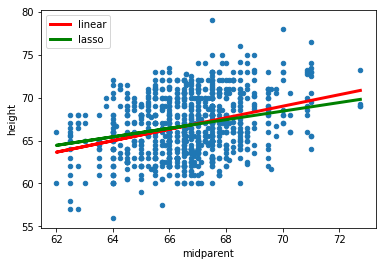

In [14]:
df.plot.scatter('midparent', 'height')
plt.plot( df['midparent'], lm.predict(df[['midparent']]), color='red', linewidth=3 , label = "linear")
plt.plot( df['midparent'], lasso.predict(df[['midparent']]), color='green', linewidth=3, label = "lasso" )
plt.legend()
plt.show()

You could now consult [the documentation of
~scikit-learn~]([https://scikit-learn.org/stable/modules/linear_model.html](https://scikit-learn.org/stable/modules/linear_model.html))
to try fitting fancier models, perhaps using the heights of both
parents.



## Is this any good?



By &ldquo;any good&rdquo; we mean: is our model valid?  To evaluate the
performance of the model, we would need to test it on some unseen
data&#x2026; but we aren&rsquo;t going to find children and their parents and
measure their heights.

****Cross-validation**** is a solution to the question of &ldquo;validity&rdquo; of
the model, and also a solution to our not having unseen data.  Instead
of running `fit` on **all** the data, we keep aside some portion of the
data and use that &ldquo;hold-out&rdquo; data for validation.

To be more specific, there are various ways of arranging for this.  We
might **split the data into a training set and a testing set**. 

Another method is **k-fold cross-validation** in which the original data
is partitioned (randomly) into $k$ equal sized subsamples. Of the $k$
subsamples, a single subsample is retained as the validation data for
testing the model, and the remaining $k â 1$ subsamples are used as
training data.  Conveniently, `scikit-learn` has methods for this.



In [8]:
from sklearn.model_selection import KFold

Let&rsquo;s use it.



In [9]:
model = LinearRegression()
scores = []

X = df[['midparent']]
y = df['height']

kf = KFold(n_splits=5, shuffle=True, random_state=1)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)

scores

[0.08405816314737413,
 0.1081277742956952,
 0.08533372381996007,
 0.12864783606331032,
 0.1223630213038146]

Those $R^2$ scores are not especially reassuring.  Can we do better?
Are we missing something in our model?



In [10]:
model = linear_model.LassoLars(alpha=0.001)
scores = []

X = df[['midparent']]
y = df['height']

kf = KFold(n_splits=5, shuffle=True, random_state=1)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)

scores

[0.08455956654248487,
 0.10782477548818949,
 0.0862237958379134,
 0.12848565881645269,
 0.12134266030853912]